In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format

dataframe = pd.read_csv('fiuba-trocafone-tp1-final-set/events.csv',low_memory=False)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

# 1. Comparación por marca

In [161]:
dataframe['marca'], dataframe['modelo'] = dataframe['model'].str.split(' ',1).str
dataframe['marca'] = dataframe['marca'].apply(lambda marca: 'Apple' if (marca == 'iPhone' or marca == 'iPad') else marca)

prod1=dataframe[dataframe['event'] == 'conversion']
conversion = prod1['marca'].value_counts()

prod2=dataframe[dataframe['event'] == 'checkout']
checkout = prod2['marca'].value_counts()


In [162]:
tabla1 = pd.concat([conversion],axis=1)
tabla1.columns = ['conversion']
tabla1['conversion_log'] = np.log(tabla1["conversion"]+1)

tabla2 = pd.concat([checkout],axis=1)
tabla2.columns = ['checkout']
tabla2['checkout_log'] = np.log(tabla2["checkout"]+1)

tabla = pd.concat([tabla2['checkout_log'],tabla1['conversion_log']],axis=1)
tabla

,checkout_log,conversion_log
Apple,9.56,5.78
Asus,4.16,1.10
LG,6.33,3.04
Lenovo,5.61,2.71
Motorola,8.23,5.01
Quantum,3.00,nan
Samsung,9.60,6.46
Sony,5.39,3.18


Text(0.5,0,'Marca')

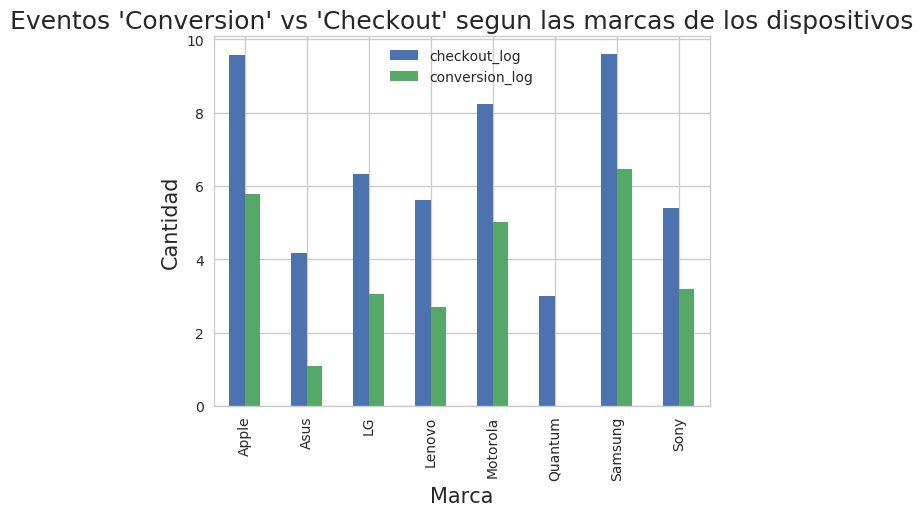

In [163]:
'''
Grafico de barras de ventas por marca de dispositivo.
'''
g = tabla.plot.bar()
g.set_title("Eventos 'Conversion' vs 'Checkout' segun las marcas de los dispositivos", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Marca", fontsize=15)

Text(0,0.5,'Marca')

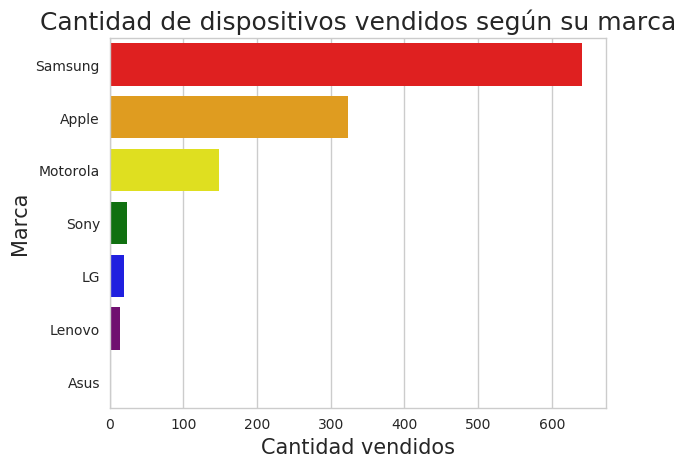

In [164]:
'''
Grafico de barras de ventas por marca de dispositivo.
'''
g = sns.barplot(x=conversion.values, y=conversion.index, orient='h',palette=['red','orange','yellow','green','blue','purple','indigo'])
g.set_title("Cantidad de dispositivos vendidos según su marca", fontsize=18)
g.set_xlabel("Cantidad vendidos", fontsize=15)
g.set_ylabel("Marca", fontsize=15)

Text(0.5,0,'Modelo')

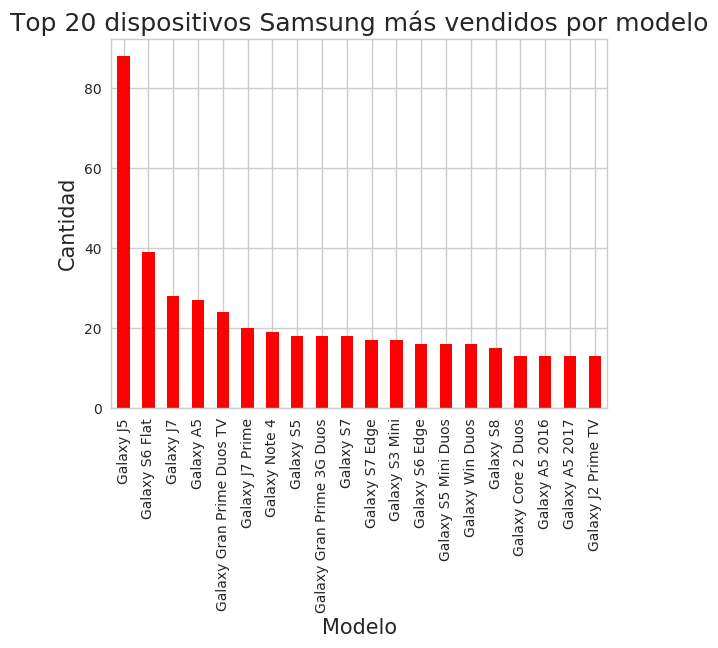

In [171]:
'''
Grafico de barras de top 20 dispositivos Samsung mas vendidos.
'''
SamsungVendidos = prod1.loc[prod1.marca == 'Samsung',:]['modelo'].value_counts().head(20)
SamsungVendidos

g = SamsungVendidos.plot.bar(color=['red'])
g.set_title("Top 20 dispositivos Samsung más vendidos por modelo", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Modelo", fontsize=15)

Text(0.5,0,'Modelo')

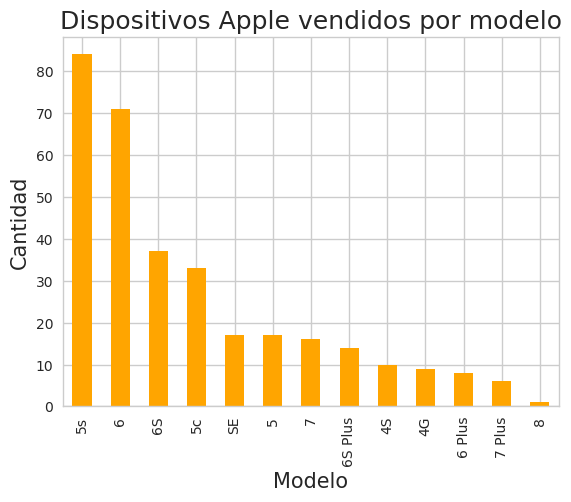

In [169]:
'''
Grafico de barras de dispositivos Apple mas vendidos.
'''

AppleVendidos = prod1.loc[prod1.marca == 'Apple',:]['modelo'].value_counts()
AppleVendidos

g = AppleVendidos.plot.bar(color=['orange'])
g.set_title("Dispositivos Apple vendidos por modelo", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Modelo", fontsize=15)

Text(0.5,0,'Modelo')

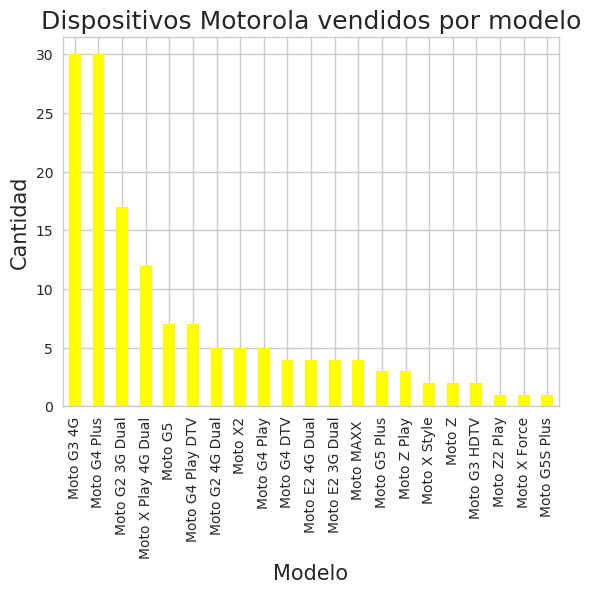

In [172]:
'''
Grafico de barras de dispositivos Motorola mas vendidos.
'''
MotorolaVendidos = prod1.loc[prod1.marca == 'Motorola',:]['modelo'].value_counts()
MotorolaVendidos

g = MotorolaVendidos.plot.bar(color=['yellow'])
g.set_title("Dispositivos Motorola vendidos por modelo", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Modelo", fontsize=15)

Text(0.5,1,'Cantidad de conversiones con respecto a la condicion del producto')

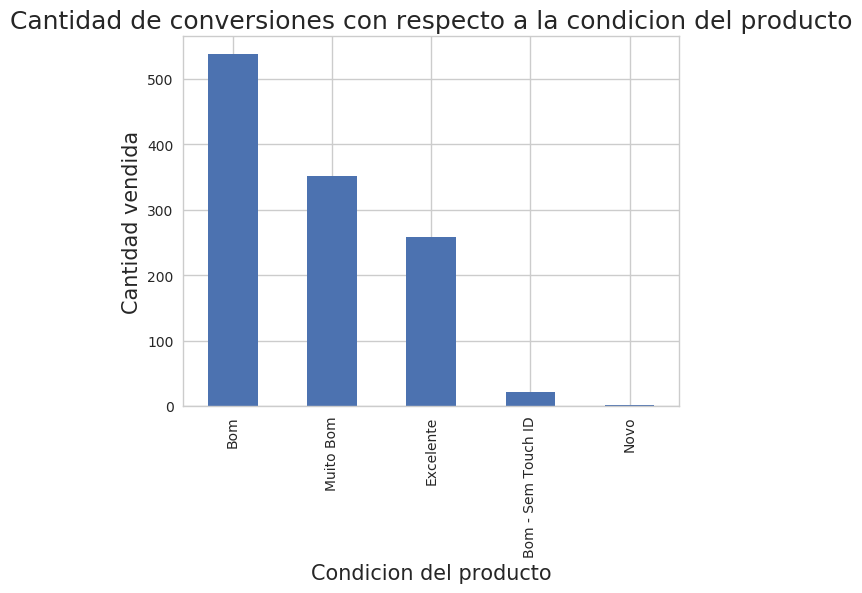

In [173]:
conversiones=dataframe[dataframe['event'] == 'conversion']
condicionDeConversiones=conversiones['condition'].value_counts()
g=condicionDeConversiones.plot.bar()
g.set_xlabel('Condicion del producto',fontsize=15)
g.set_ylabel('Cantidad vendida',fontsize=15)
g.set_title('Cantidad de conversiones con respecto a la condicion del producto', fontsize=18)

# 2. Comparación por fecha

In [174]:
'''
Agrego las columnas año, mes y dia.
'''
dataframe['año'],dataframe['mes'],dataframe['dia']= dataframe['timestamp'].str.split(' ').str[0].str.split('-').str

In [90]:
dataframe['actividad'] = 1
for_heatmap = dataframe.pivot_table(index='mes', columns='dia', values='actividad', aggfunc='sum')

Text(50.7222,0.5,'Mes')

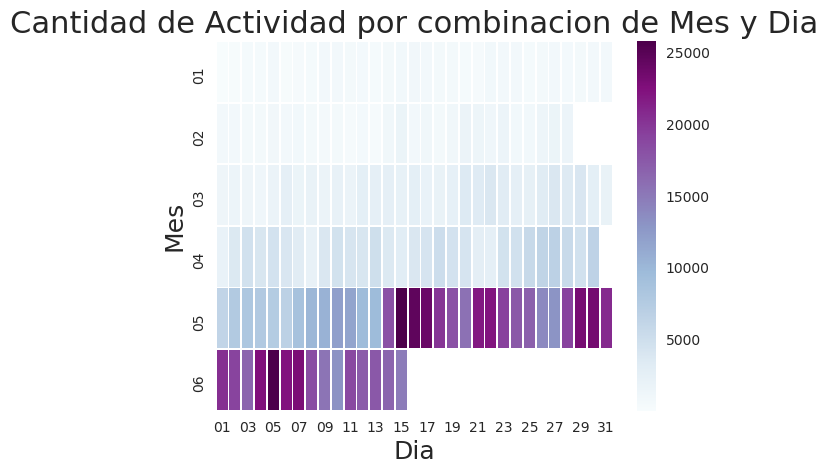

In [91]:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="BuPu") # annot=True
g.set_title("Cantidad de Actividad por combinacion de Mes y Dia", fontsize=22)
g.set_xlabel("Dia",fontsize=18)
g.set_ylabel("Mes", fontsize=18)

In [92]:
dataframe['compra'] = dataframe['event']=='conversion'
for_heatmap = dataframe.pivot_table(index='mes', columns='dia', values='compra', aggfunc='sum')

Text(50.7222,0.5,'Mes')

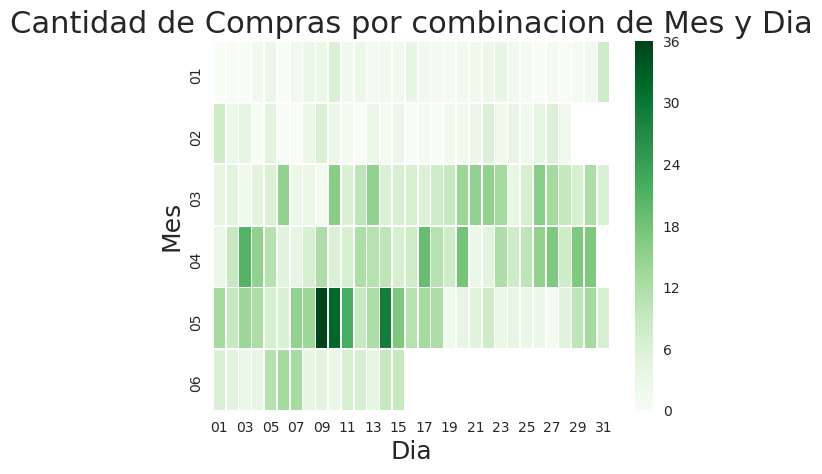

In [93]:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="Greens") # annot=True
g.set_title("Cantidad de Compras por combinacion de Mes y Dia", fontsize=22)
g.set_xlabel("Dia",fontsize=18)
g.set_ylabel("Mes", fontsize=18)

In [94]:
dataframe['checkout'] = dataframe['event']=='checkout'
for_heatmap = dataframe.pivot_table(index='mes', columns='dia', values='checkout', aggfunc='sum')

Text(50.7222,0.5,'Mes')

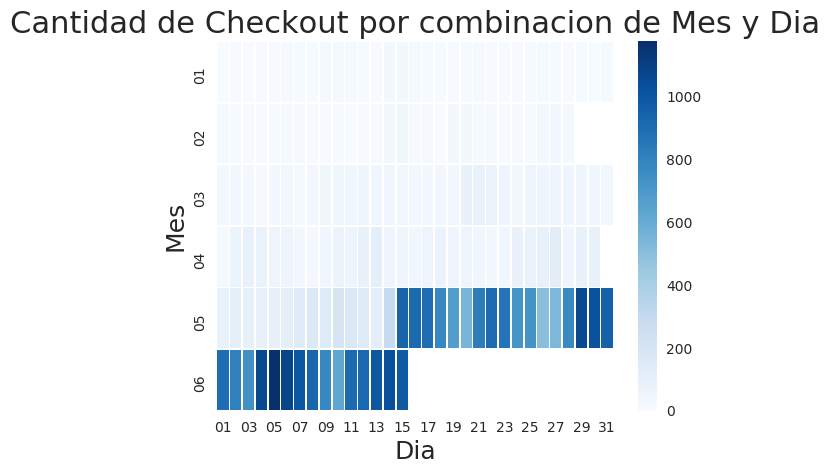

In [95]:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="Blues") # annot=True
g.set_title("Cantidad de Checkout por combinacion de Mes y Dia", fontsize=22)
g.set_xlabel("Dia",fontsize=18)
g.set_ylabel("Mes", fontsize=18)

# 3. Comparación por ubicación

In [96]:
dataframe['pais'] = dataframe['country'].dropna().apply(lambda country: 'Other' if (country != 'Brazil') else country)

In [97]:
ingresoPorPais = dataframe.loc[dataframe['event'] == 'visited site'].filter(items = ['pais','event']).groupby('pais').count()
ingresoPorPais = ingresoPorPais.loc[ingresoPorPais['event'] > 10]['event']

Text(0,0.5,'')

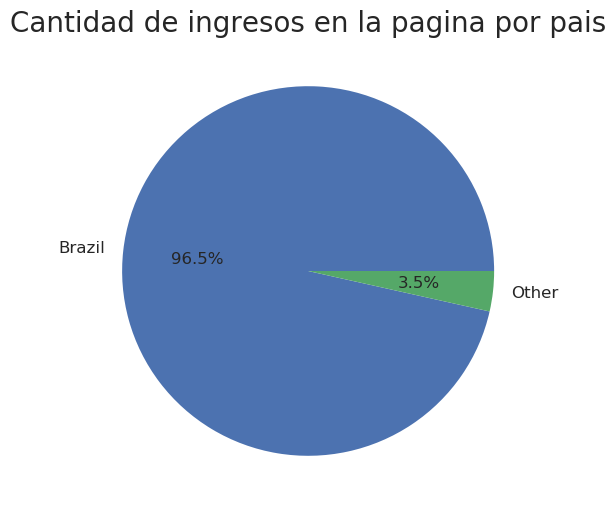

In [98]:
'''
Grafico pie de eventos en la pagina por pais.
'''

g = ingresoPorPais.plot(kind='pie',autopct='%1.1f%%',figsize=(6,6),fontsize=12)
g.set_title("Cantidad de ingresos en la pagina por pais",fontsize=20)
g.set_ylabel("")

Text(0,0.5,'Region')

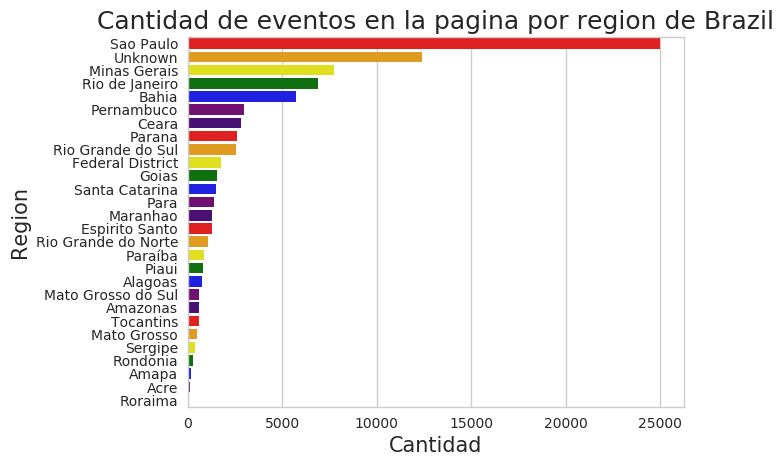

In [99]:
'''
Grafico de barras de eventos en la pagina por region en Brazil.
'''
ingresoPorRegionEnBrazil = dataframe.filter(items = ['country','region','event']).loc[dataframe['country'] == 'Brazil']['region'].value_counts()

g = sns.barplot(x=ingresoPorRegionEnBrazil.values, y=ingresoPorRegionEnBrazil.index, orient='h',palette=['red','orange','yellow','green','blue','purple','indigo'])
g.set_title("Cantidad de eventos en la pagina por region de Brazil", fontsize=18)
g.set_xlabel("Cantidad", fontsize=15)
g.set_ylabel("Region", fontsize=15)

# 4. Comparación por ad campaign

Text(0,0.5,'Ad')

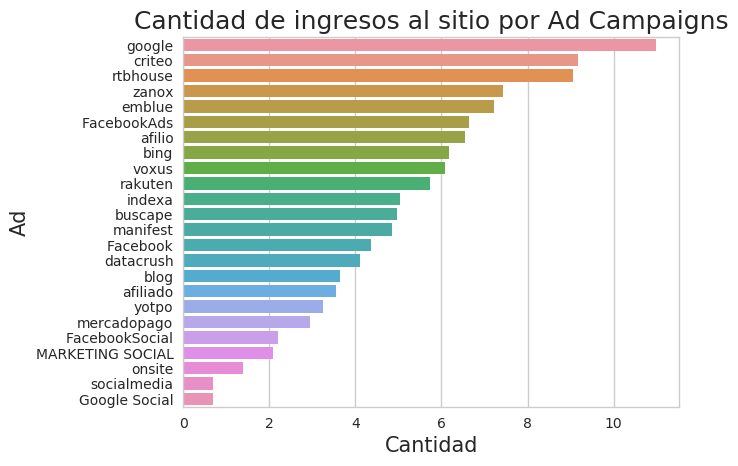

In [100]:
'''
Grafico de barras de la cantidad de ingresos al sitio por Ad Campaigns.
'''
ingresosPorAd = dataframe.loc[dataframe['event'] == 'ad campaign hit']['campaign_source'].value_counts()
ingresosPorAd_log= np.log(ingresosPorAd+1)
g = sns.barplot(x=ingresosPorAd_log.values, y=ingresosPorAd.index, orient='h')
g.set_title("Cantidad de ingresos al sitio por Ad Campaigns", fontsize=18)
g.set_xlabel("Cantidad", fontsize=15)
g.set_ylabel("Ad", fontsize=15)

Text(0,0.5,'Marca')

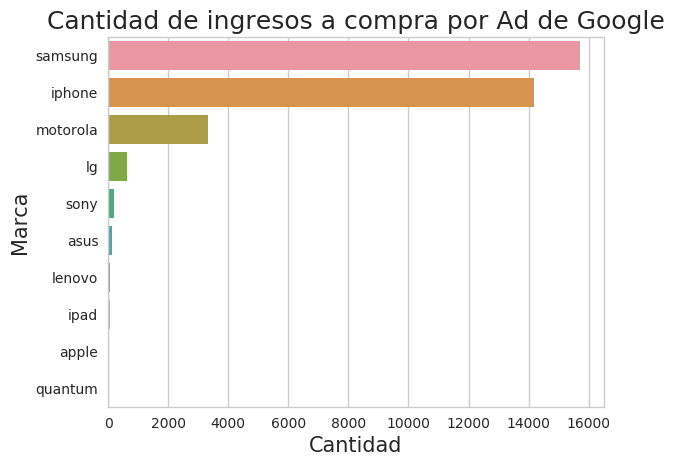

In [101]:
'''
Grafico de barras de la cantidad de ingresos a compra por Ad Campaigns de Google.
'''
ingresosCompraPorAdDeGoogle = dataframe.loc[dataframe['campaign_source'] == 'google']['url'].dropna().apply(lambda url: (str(url).split('/')[2]) if (str(url).split('/')[1] == 'comprar') else None).value_counts()

g = sns.barplot(x=ingresosCompraPorAdDeGoogle.values, y=ingresosCompraPorAdDeGoogle.index, orient='h')
g.set_title("Cantidad de ingresos a compra por Ad de Google", fontsize=18)
g.set_xlabel("Cantidad", fontsize=15)
g.set_ylabel("Marca", fontsize=15)

Text(0,0.5,'Marca')

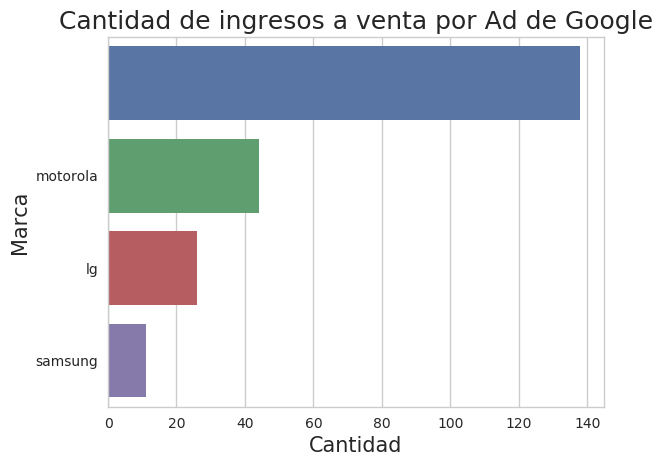

In [102]:
'''
Grafico de barras de la cantidad de ingresos a venta por Ad Campaigns de Google.
'''
ing = dataframe[dataframe['campaign_source'] == 'google']
ingresosVentaPorAdDeGoogle = ing['url'].dropna().apply(lambda url: (str(url).split('/')[2]) if (str(url).split('/')[1] == 'vender' and len(str(url).split('/'))>=3) else None).value_counts()

g = sns.barplot(x=ingresosVentaPorAdDeGoogle.values, y=ingresosVentaPorAdDeGoogle.index, orient='h')
g.set_title("Cantidad de ingresos a venta por Ad de Google", fontsize=18)
g.set_xlabel("Cantidad", fontsize=15)
g.set_ylabel("Marca", fontsize=15)

# 5. no se

In [ ]:
'''
Devuelven listas con los colores mas comprados por marca.
La idea es armar un grafico con los celulares y sus colores.
'''

dataframe['color general'] = dataframe['color'].loc[dataframe['marca'] == 'Samsung'].dropna().apply(lambda a: str(a).split(' ')[0])
top5ColoresSamsung = dataframe['color general'].value_counts().head(5).index.tolist()

dataframe['color general'] = dataframe['color'].loc[dataframe['marca'] == 'Apple'].dropna().apply(lambda a: str(a).split(' ')[0])
top5ColoresApple = dataframe['color general'].value_counts().head(5).index.tolist()

dataframe['color general'] = dataframe['color'].loc[dataframe['marca'] == 'Motorola'].dropna().apply(lambda a: str(a).split(' ')[0])
top5ColoresMotorola = dataframe['color general'].value_counts().head(5).index.tolist()
